In [6]:
# We first get all the relevant imports
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
# We get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

File ‘moore.csv’ already there; not retrieving.



In [8]:
# Load the data 
data = pd.read_csv('moore.csv', header=None).values # Load as numpy
X = data[:,0].reshape(-1,1) # 2D array of size NxD, D=1
y = data[:,1].reshape(-1,1)

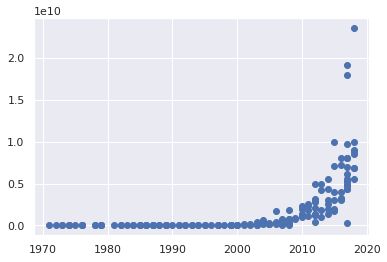

In [9]:
# Plot the data
plt.scatter(X,y)

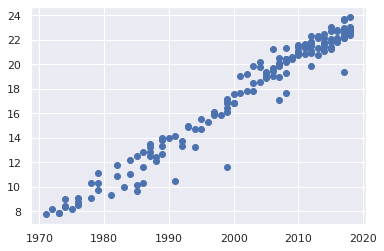

In [10]:
# A linear model is desired, so we take the log
y = np.log(y)
plt.scatter(X,y)

In [11]:
# We perform data pre-processing
# The data is standardized/normalized for X and y
mean_X = X.mean()
std_X = X.std()
mean_y = y.mean()
std_y = y.std()

# We keep the above as variables, to reverse transformations and go back to orig. units.

X = (X - mean_X) / std_X
y = (y - mean_y) / std_y

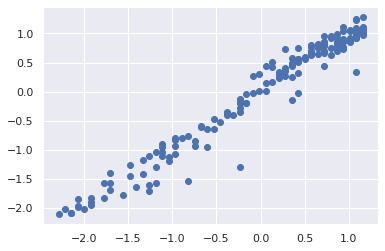

In [12]:
plt.scatter(X,y)

In [13]:
X = X.astype(np.float32)
y = y.astype(np.float32)

In [14]:
# Create the linear regression model
model = nn.Linear(1,1)

In [15]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.7)

In [16]:
# Prepare the data
inputs = torch.from_numpy(X)
targets = torch.from_numpy(y)

In [17]:
# Train the model
number_epochs = 100
losses = []
for iteration in range(number_epochs):
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    losses.append(loss.item())
    loss.backward()
    optimizer.step()
    print("Epoch {}/{}, Loss: {:.5f}".format(iteration+1, number_epochs, loss.item()))

Epoch 1/100, Loss: 0.98226
Epoch 2/100, Loss: 0.94489
Epoch 3/100, Loss: 0.88380
Epoch 4/100, Loss: 0.80967
Epoch 5/100, Loss: 0.73028
Epoch 6/100, Loss: 0.65096
Epoch 7/100, Loss: 0.57513
Epoch 8/100, Loss: 0.50480
Epoch 9/100, Loss: 0.44100
Epoch 10/100, Loss: 0.38405
Epoch 11/100, Loss: 0.33385
Epoch 12/100, Loss: 0.29003
Epoch 13/100, Loss: 0.25207
Epoch 14/100, Loss: 0.21940
Epoch 15/100, Loss: 0.19142
Epoch 16/100, Loss: 0.16755
Epoch 17/100, Loss: 0.14725
Epoch 18/100, Loss: 0.13004
Epoch 19/100, Loss: 0.11548
Epoch 20/100, Loss: 0.10318
Epoch 21/100, Loss: 0.09281
Epoch 22/100, Loss: 0.08408
Epoch 23/100, Loss: 0.07673
Epoch 24/100, Loss: 0.07056
Epoch 25/100, Loss: 0.06537
Epoch 26/100, Loss: 0.06102
Epoch 27/100, Loss: 0.05736
Epoch 28/100, Loss: 0.05430
Epoch 29/100, Loss: 0.05173
Epoch 30/100, Loss: 0.04958
Epoch 31/100, Loss: 0.04777
Epoch 32/100, Loss: 0.04626
Epoch 33/100, Loss: 0.04499
Epoch 34/100, Loss: 0.04393
Epoch 35/100, Loss: 0.04305
Epoch 36/100, Loss: 0.04230
E

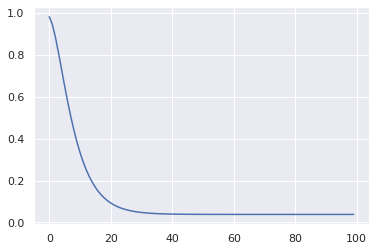

In [18]:
# Loss per iter
plt.plot(losses)

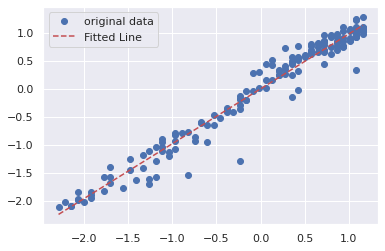

In [20]:
# Plot the line of best fit
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, y, 'bo', label='original data')
plt.plot(X, predicted, 'r--', label='Fitted Line')
plt.legend()
plt.show()

In [21]:
# Weights:
w = model.weight.data.numpy()
print(w)

[[0.98040175]]


In [22]:
a = w[0,0] * std_y / std_X

In [23]:
print("Doubling time:", np.log(2) / a)

Doubling time: 2.028979975169326


# From The Instructor
## Transforming back to original scale

Our original hypothesis is that the growth is exponential. This has the form:

$$ C = C_0 r ^ t $$

In this equation, $C$ is the transistor count, $t$ is the year, $C_0$ is the original transistor count at year $0$, and $r$ is the rate of growth.

We made this equation linear by taking the log of both sides.

$$ \log C = \log C_0 + \log r * t $$

Here, $\log C$ represents the variable that goes along the y-axis, and $t$ represents the variable that goes along the x-axis.

In other words, under our hypothesized model, the log of transistor counts is linear with respect to time.

Let us rename the variables to a more familiar form:

$$ y = a x + \log C_0 $$

Now $y=\log C$ represents the log of transistor counts and $x=t$ represents time. $a = \log r$ is the slope and $\log C_0$ is the y-intercept.

### Our Model

We normalized the data as follows:

$$ y' = \frac{y - m_y}{s_y} $$

$$ x' = \frac{x - m_x}{s_x} $$

Here, $m_x$ represents the sample mean of the $x$ data and $s_x$ represens the sample standard deviation of the $x$ data, with analogous definitions for $m_y$ and $s_y$.

Our model looks like:

$$ y' = wx' + b $$

We can recover the original model by substituting $x'$ and $y'$ with corresponding expressions in terms of $x$ and $y$.

$$ \frac{y - m_y}{s_y} = w \frac{x - m_x}{s_x} + b $$

After some algebraic manipulation (try it yourself, it's only high school math), we get:

$$ y = w \frac{s_y}{s_x} x - w \frac{s_y}{s_x} m_x + b s_y + m_y = a x + \log C_0 $$

It is clear that the coefficient in front of $x$ represents our original $a$, and the sum of all the other terms represents $\log C_0$.

We are only interested in the doubling time, so we have found that:

$$ a = w \frac{s_y}{s_x} $$

## Exponential Growth Model

Our equation is currently linear. We still need to find the doubling time.

Our original model for exponential growth is:

$$ C = C_0 r^t $$

Where $ C $ is transistor the count and $ t $ is the year.

$ r $ is the rate of growth. For example, when $ t $ goes from 1 to 2, $ C $ increases by a factor of $ r $. When $ t $ goes from 2 to 3, $ C $ increases by a factor of $ r $ again.

When we take the log of both sides, we get:

$$ \log C = \log r * t + \log C_0 $$

This is our linear equation:

$$ y = ax + \log C_0 $$

Where:

$$ y = \log C $$
$$ a = \log r $$
$$ x = t $$

We are interested in $ r $, because that's the rate of growth. Given our regression weights, we know that:

$$ a = 0.341659983 $$

so that:

$$ r = e^{0.341659983} = 1.40728 $$

To find the time it takes for transistor count to double, we simply need to find the amount of time it takes for $ C $ to increase to $ 2C $.

Let's call the original starting time $ t $, to correspond with the initial transistor count $ C $.

Let's call the end time $ t' $, to correspond with the final transistor count $ 2C $.

Then we also have:

$$ 2C = C_0 r ^ {t'} $$

Combine this with our original equation:

$$ C = C_0 r^t $$

We get (by dividing the 2 equations):

$$ 2C/C = (C_0 r ^ {t'}) / C_0 r^t $$

Which simplifies to:

$$ 2 = r^{(t' - t)} $$

Solve for $ t' - t $:

$$ t' - t = \frac{\log 2}{\log r} = \frac{\log2}{a}$$


Important note! We haven't specified what the starting time $ t $ actually is, and we don't have to since we just proved that this holds for any $ t $.